All Proteins (Pten wt median - mutated median) 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import gseapy as gp
import re
import sys 

import cptac
import cptac.utils as u

import sys
sys.path.append('C:\\Users\\brittany henderson\\GitHub\\WhenMutationsDontMatter\\')
import plot_utils as p

In [2]:
gbm = cptac.Gbm()
endo = cptac.Endometrial()

In [3]:
cancer1 = "GBM"
cancer2 = "Endometrial"
gene = 'PTEN'

In [4]:
#GBM ttest
# Step 1 - Create dataframe in order to do comparisons with wrap_ttest
prot = gbm.get_proteomics()
gbm_prot_list = list(prot.columns)
prot_and_mutations = gbm.join_omics_to_mutations(
    mutations_genes = [gene], omics_df_name = 'proteomics', omics_genes = gbm_prot_list)  

# Step 2 - Create binary column 
prot_and_mutations['binary_mutations'] = np.where(
            prot_and_mutations[gene+'_Mutation_Status'] == 'Wildtype_Tumor', 'Wildtype', 'Mutated')

# Step 3 - Format the dataframe correctly for the T-test(just omics and binary columns for tumors)
tumors = prot_and_mutations[prot_and_mutations.Sample_Status == 'Tumor'] #drop Normal samples
columns_to_drop = [gene+"_Mutation", gene+"_Location", gene+"_Mutation_Status", "Sample_Status"]
mut_status = tumors.drop(columns_to_drop, axis = 1)
mut_status = mut_status.dropna(axis=1,how='all')
gbm_prot = list(mut_status.columns[:-1]) # new prot list without na in all tumor (sometimes values in normal)

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 82 samples for the PTEN gene (C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\ipykernel_launcher.py, line 6)


In [5]:
mut_df = mut_status.loc[mut_status['binary_mutations'] == 'Mutated']
wt_df = mut_status.loc[mut_status['binary_mutations'] == 'Wildtype']

mut_med = mut_df.median()
wt_med = wt_df.median()

gbm_d = {}

for prot in gbm_prot:
    dif_gbm = mut_med[prot] - wt_med[prot]
    gbm_d[prot] = dif_gbm

gbm_df = pd.DataFrame.from_dict(gbm_d, orient='index', columns=['Gbm'])
gbm_df

C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\numpy\lib\nanfunctions.py:1076: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


,Gbm
A1BG_proteomics,0.040188
A2M_proteomics,0.108524
AAAS_proteomics,0.058545
AACS_proteomics,-0.057941
AADAT_proteomics,0.175684
...,...
ZXDC_proteomics,0.061036
ZYG11B_proteomics,0.064513
ZYX_proteomics,0.116899
ZZEF1_proteomics,0.031760


Endo

In [6]:
#Endo ttest
# Step 1 - Create dataframe in order to do comparisons with wrap_ttest
prot = endo.get_proteomics()
en_prot_list = list(prot.columns)
prot_and_mutations = endo.join_omics_to_mutations(
    mutations_genes = [gene], omics_df_name = 'proteomics', omics_genes = en_prot_list)  

# Step 2 - Create binary column 
prot_and_mutations['binary_mutations'] = np.where(
            prot_and_mutations[gene+'_Mutation_Status'] == 'Wildtype_Tumor', 'Wildtype', 'Mutated')

# Step 3 - Format the dataframe correctly for the T-test(just omics and binary columns for tumors)
tumors = prot_and_mutations[prot_and_mutations.Sample_Status == 'Tumor'] #drop Normal samples
columns_to_drop = [gene+"_Mutation", gene+"_Location", gene+"_Mutation_Status", "Sample_Status"]
mut_status = tumors.drop(columns_to_drop, axis = 1)
mut_status = mut_status.dropna(axis=1,how='all')
en_prot = list(mut_status.columns[:-1])

mut_status

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 69 samples for the PTEN gene (C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\ipykernel_launcher.py, line 6)


Name,A1BG_proteomics,A2M_proteomics,A2ML1_proteomics,A4GALT_proteomics,AAAS_proteomics,AACS_proteomics,AADAT_proteomics,AAED1_proteomics,AAGAB_proteomics,AAK1_proteomics,...,ZSWIM9_proteomics,ZW10_proteomics,ZWILCH_proteomics,ZWINT_proteomics,ZXDC_proteomics,ZYG11B_proteomics,ZYX_proteomics,ZZEF1_proteomics,ZZZ3_proteomics,binary_mutations
Sample_ID,,,,,,,,,,,,,,,,,,,,,
S001,-1.180,-0.8630,-0.8020,0.2220,0.2560,0.6650,1.2800,-0.3390,0.4120,-0.664,...,NaN,0.02290,0.1090,NaN,-0.332,-0.43300,-1.020,-0.12300,-0.0859,Mutated
S002,-0.685,-1.0700,-0.6840,0.9840,0.1350,0.3340,1.3000,0.1390,1.3300,-0.367,...,NaN,0.36300,1.0700,0.7370,-0.564,-0.00461,-1.130,-0.07570,-0.4730,Mutated
S003,-0.528,-1.3200,0.4350,NaN,-0.2400,1.0400,-0.0213,-0.0479,0.4190,-0.500,...,-0.1450,0.01050,-0.1160,NaN,0.151,-0.07400,-0.540,0.32000,-0.4190,Mutated
S005,-1.670,-1.1900,-0.4430,0.2430,-0.0993,0.7570,0.7400,-0.9290,0.2290,-0.223,...,-0.0552,-0.07140,0.0933,0.1560,-0.398,-0.07520,-0.797,-0.03010,-0.4670,Mutated
S006,-0.374,-0.0206,-0.5370,0.3110,0.3750,0.0131,-1.1000,NaN,0.5650,-0.101,...,NaN,-1.22000,-0.5620,0.9370,-0.646,0.20700,-1.850,-0.17600,0.0513,Wildtype
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
S099,-1.070,-0.7120,0.0462,-0.0471,0.2270,1.3500,1.2100,0.0048,0.6820,-0.224,...,-0.4010,0.55700,0.8270,0.3480,-0.187,-0.10700,-0.830,0.06200,-0.5280,Mutated
S100,-1.280,-0.7360,-0.5520,0.1140,0.2730,1.0700,0.8500,NaN,-0.5360,-0.266,...,NaN,-0.00364,0.7630,0.0784,-0.203,0.01320,-1.200,-0.35700,0.0299,Wildtype
S101,-0.290,-0.3200,3.1700,-0.9070,0.0317,-0.0425,NaN,-0.2730,-0.0747,0.124,...,-0.5210,0.05230,0.5150,0.5850,0.138,-0.19000,-0.966,-0.00627,-0.2490,Wildtype


In [7]:
mut_df = mut_status.loc[mut_status['binary_mutations'] == 'Mutated']
wt_df = mut_status.loc[mut_status['binary_mutations'] == 'Wildtype']

mut_med = mut_df.median()
wt_med = wt_df.median()

en_d = {}

for prot in en_prot:
    dif_en = mut_med[prot] - wt_med[prot]
    en_d[prot] = dif_en

In [8]:
en_df = pd.DataFrame.from_dict(en_d, orient='index', columns=['Endo'])
en_df

,Endo
A1BG_proteomics,-0.08550
A2M_proteomics,0.01150
A2ML1_proteomics,0.53575
A4GALT_proteomics,0.40300
AAAS_proteomics,-0.24410
...,...
ZXDC_proteomics,-0.48150
ZYG11B_proteomics,-0.20160
ZYX_proteomics,0.08750
ZZEF1_proteomics,0.09025


Ovarian

In [9]:
ov = cptac.Ovarian()

In [10]:
# Step 1 - Create dataframe in order to do comparisons with wrap_ttest
prot = ov.get_proteomics()
prot = ov.reduce_multiindex(prot, levels_to_drop = 1)

ov_prot_list = list(prot.columns)
prot_and_mutations = ov.join_omics_to_mutations(
    mutations_genes = [gene], omics_df_name = 'proteomics', omics_genes = ov_prot_list) 
prot_and_mutations = ov.reduce_multiindex(prot_and_mutations, levels_to_drop = 1)
prot_and_mutations

# Step 2 - Create binary column 
prot_and_mutations['binary_mutations'] = np.where(
            prot_and_mutations[gene+'_Mutation_Status'] == 'Wildtype_Tumor', 'Wildtype', 'Mutated')

# Step 3 - Format the dataframe correctly for the T-test(just omics and binary columns for tumors)
tumors = prot_and_mutations[prot_and_mutations.Sample_Status == 'Tumor'] #drop Normal samples
columns_to_drop = [gene+"_Mutation", gene+"_Location", gene+"_Mutation_Status", "Sample_Status"]
mut_status = tumors.drop(columns_to_drop, axis = 1)
mut_status = mut_status.dropna(axis=1,how='all')
ov_prot = list(mut_status.columns[:-1])

cptac warning: Due to dropping the specified levels, dataframe now has 1162 duplicated column headers. (C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\ipykernel_launcher.py, line 3)
cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 99 samples for the PTEN gene (C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\ipykernel_launcher.py, line 7)
cptac warning: Due to dropping the specified levels, dataframe now has 1162 duplicated column headers. (C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\ipykernel_launcher.py, line 8)


In [11]:
mut_df = mut_status.loc[mut_status['binary_mutations'] == 'Mutated']
wt_df = mut_status.loc[mut_status['binary_mutations'] == 'Wildtype']

mut_med = mut_df.median()
wt_med = wt_df.median()

ov_dict = {}

for prot in ov_prot:
    delta_ov = mut_med[prot] - wt_med[prot]
    ov_dict[prot] = delta_ov

ov_df = pd.DataFrame.from_dict(ov_dict, orient='index', columns=['Ovarian'])
ov_df

,Ovarian
A1BG_proteomics,0.253846
A2M_proteomics,-0.316928
A2ML1_proteomics,-0.438039
AAAS_proteomics,0.160948
AACS_proteomics,0.384572
...,...
ZWINT_proteomics,0.468774
ZYG11B_proteomics,-0.191364
ZYX_proteomics,-0.183404
ZZEF1_proteomics,0.188278


Breast

In [12]:
#b = cptac.Brca()

No Somatic Mut in brca

In [13]:
'''
# Step 1 - Create dataframe in order to do comparisons with wrap_ttest
prot = b.get_proteomics()
#prot = b.reduce_multiindex(prot, levels_to_drop = 1)
prot_list = list(prot.columns)
prot_and_mutations = b.join_omics_to_mutations(
    mutations_genes = [gene], omics_df_name = 'proteomics', omics_genes = prot_list) 
prot_and_mutations = b.reduce_multiindex(prot_and_mutations, levels_to_drop = 1)

# Step 2 - Create binary column 
prot_and_mutations['binary_mutations'] = np.where(
            prot_and_mutations[gene+'_Mutation_Status'] == 'Wildtype_Tumor', 'Wildtype', 'Mutated')

# Step 3 - Format the dataframe correctly for the T-test(just omics and binary columns for tumors)
tumors = prot_and_mutations[prot_and_mutations.Sample_Status == 'Tumor'] #drop Normal samples
columns_to_drop = [gene+"_Mutation", gene+"_Location", gene+"_Mutation_Status", "Sample_Status"]
mut_status = tumors.drop(columns_to_drop, axis = 1)
mut_status = mut_status.dropna(axis=1,how='all')
b_prot = list(mut_status.columns[:-1])'''

'\n# Step 1 - Create dataframe in order to do comparisons with wrap_ttest\nprot = b.get_proteomics()\n#prot = b.reduce_multiindex(prot, levels_to_drop = 1)\nprot_list = list(prot.columns)\nprot_and_mutations = b.join_omics_to_mutations(\n    mutations_genes = [gene], omics_df_name = \'proteomics\', omics_genes = prot_list) \nprot_and_mutations = b.reduce_multiindex(prot_and_mutations, levels_to_drop = 1)\n\n# Step 2 - Create binary column \nprot_and_mutations[\'binary_mutations\'] = np.where(\n            prot_and_mutations[gene+\'_Mutation_Status\'] == \'Wildtype_Tumor\', \'Wildtype\', \'Mutated\')\n\n# Step 3 - Format the dataframe correctly for the T-test(just omics and binary columns for tumors)\ntumors = prot_and_mutations[prot_and_mutations.Sample_Status == \'Tumor\'] #drop Normal samples\ncolumns_to_drop = [gene+"_Mutation", gene+"_Location", gene+"_Mutation_Status", "Sample_Status"]\nmut_status = tumors.drop(columns_to_drop, axis = 1)\nmut_status = mut_status.dropna(axis=1,how=

In [14]:
'''
mut_df = mut_status.loc[mut_status['binary_mutations'] == 'Mutated']
wt_df = mut_status.loc[mut_status['binary_mutations'] == 'Wildtype']

mut_med = mut_df.median()
wt_med = wt_df.median()

b_dict = {}

for prot in b_prot:
    delta_b = mut_med[prot] - wt_med[prot]
    b_d[prot] = delta_b

b_df = pd.DataFrame.from_dict(gbm_d, orient='index', columns=['Breast'])
b_df'''

"\nmut_df = mut_status.loc[mut_status['binary_mutations'] == 'Mutated']\nwt_df = mut_status.loc[mut_status['binary_mutations'] == 'Wildtype']\n\nmut_med = mut_df.median()\nwt_med = wt_df.median()\n\nb_dict = {}\n\nfor prot in b_prot:\n    delta_b = mut_med[prot] - wt_med[prot]\n    b_d[prot] = delta_b\n\nb_df = pd.DataFrame.from_dict(gbm_d, orient='index', columns=['Breast'])\nb_df"

Colon

In [15]:
col = cptac.Colon()

In [16]:
# Step 1 - Create dataframe in order to do comparisons with wrap_ttest
prot = col.get_proteomics()
col_prot_list = list(prot.columns)
prot_and_mutations = col.join_omics_to_mutations(
    mutations_genes = [gene], omics_df_name = 'proteomics', omics_genes = col_prot_list) 
#prot_and_mutations = col.reduce_multiindex(prot_and_mutations, levels_to_drop = 1)

# Step 2 - Create binary column 
prot_and_mutations['binary_mutations'] = np.where(
            prot_and_mutations[gene+'_Mutation_Status'] == 'Wildtype_Tumor', 'Wildtype', 'Mutated')

# Step 3 - Format the dataframe correctly for the T-test(just omics and binary columns for tumors)
tumors = prot_and_mutations[prot_and_mutations.Sample_Status == 'Tumor'] #drop Normal samples
columns_to_drop = [gene+"_Mutation", gene+"_Location", gene+"_Mutation_Status", "Sample_Status"]
mut_status = tumors.drop(columns_to_drop, axis = 1)
mut_status = mut_status.dropna(axis=1,how='all')
col_prot = list(mut_status.columns[:-1])

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 201 samples for the PTEN gene (C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\ipykernel_launcher.py, line 5)
cptac warning: proteomics data was not found for the following samples, so proteomics data columns were filled with NaN for these samples: S001, S013, S015, S017, S038, S080, S081, S090, S099, S109 (C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\ipykernel_launcher.py, line 5)


In [17]:
mut_df = mut_status.loc[mut_status['binary_mutations'] == 'Mutated']
wt_df = mut_status.loc[mut_status['binary_mutations'] == 'Wildtype']

mut_med = mut_df.median()
wt_med = wt_df.median()

col_dict = {}

for prot in col_prot:
    delta_col = mut_med[prot] - wt_med[prot]
    col_dict[prot] = delta_col

col_df = pd.DataFrame.from_dict(col_dict, orient='index', columns=['Colon'])
col_df

,Colon
A1BG_proteomics,-0.10650
A1CF_proteomics,-0.32690
A2M_proteomics,-0.12400
AAAS_proteomics,0.10800
AACS_proteomics,0.02100
...,...
ZW10_proteomics,0.06040
ZWILCH_proteomics,0.34465
ZWINT_proteomics,0.28480
ZYX_proteomics,-0.08650


Kidney

In [18]:
r = cptac.Ccrcc()

In [19]:
gene = 'PTEN'
# Step 1 - Create dataframe in order to do comparisons with wrap_ttest
p = r.get_proteomics()
prot = r.reduce_multiindex(p, levels_to_drop = 1)
k_prot_list = list(prot.columns)
k_prot_list

prot_and_mutations = r.join_omics_to_mutations(
    mutations_genes = gene, omics_df_name = 'proteomics', omics_genes = k_prot_list) 
prot_and_mutations = r.reduce_multiindex(prot_and_mutations, levels_to_drop = 1)

# Step 2 - Create binary column 
prot_and_mutations['binary_mutations'] = np.where(
            prot_and_mutations[gene+'_Mutation_Status'] == 'Wildtype_Tumor', 'Wildtype', 'Mutated')

# Step 3 - Format the dataframe correctly for the T-test(just omics and binary columns for tumors)
tumors = prot_and_mutations[prot_and_mutations.Sample_Status == 'Tumor'] #drop Normal samples
columns_to_drop = [gene+"_Mutation", gene+"_Location", gene+"_Mutation_Status", "Sample_Status"]
mut_status = tumors.drop(columns_to_drop, axis = 1)
mut_status = mut_status.dropna(axis=1,how='all')
k_prot = list(mut_status.columns[:-1])

cptac warning: Due to dropping the specified levels, dataframe now has 907 duplicated column headers. (C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\ipykernel_launcher.py, line 4)
cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 189 samples for the PTEN gene (C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\ipykernel_launcher.py, line 9)
cptac warning: Due to dropping the specified levels, dataframe now has 907 duplicated column headers. (C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\ipykernel_launcher.py, line 10)


In [20]:
mut_df = mut_status.loc[mut_status['binary_mutations'] == 'Mutated']
wt_df = mut_status.loc[mut_status['binary_mutations'] == 'Wildtype']

mut_med = mut_df.median()
wt_med = wt_df.median()

k_dict = {}

for prot in k_prot:
    delta_k = mut_med[prot] - wt_med[prot]
    k_dict[prot] = delta_k

k_df = pd.DataFrame.from_dict(k_dict, orient='index', columns=['Kidney'])
k_df

,Kidney
A1BG_proteomics,-0.293776
A1CF_proteomics,-0.197902
A2M_proteomics,-0.438024
A4GALT_proteomics,NaN
AAAS_proteomics,0.0257413
...,...
ZXDC_proteomics,-0.38038
ZYG11B_proteomics,0.0187209
ZYX_proteomics,0.325311
ZZEF1_proteomics,-0.0195168


Lung - no mutations data

In [21]:
#l = cptac.Luad()

In [22]:
'''
# Step 1 - Create dataframe in order to do comparisons with wrap_ttest
prot = l.get_proteomics()
prot_list = list(prot.columns)
prot_and_mutations = l.join_omics_to_mutations(
    mutations_genes = [gene], omics_df_name = 'proteomics', omics_genes = prot_list) 
prot_and_mutations = l.reduce_multiindex(prot_and_mutations, levels_to_drop = 1)

# Step 2 - Create binary column 
prot_and_mutations['binary_mutations'] = np.where(
            prot_and_mutations[gene+'_Mutation_Status'] == 'Wildtype_Tumor', 'Wildtype', 'Mutated')

# Step 3 - Format the dataframe correctly for the T-test(just omics and binary columns for tumors)
tumors = prot_and_mutations[prot_and_mutations.Sample_Status == 'Tumor'] #drop Normal samples
columns_to_drop = [gene+"_Mutation", gene+"_Location", gene+"_Mutation_Status", "Sample_Status"]
mut_status = tumors.drop(columns_to_drop, axis = 1)
mut_status = mut_status.dropna(axis=1,how='all')
k_prot = list(mut_status.columns[:-1])'''

'\n# Step 1 - Create dataframe in order to do comparisons with wrap_ttest\nprot = l.get_proteomics()\nprot_list = list(prot.columns)\nprot_and_mutations = l.join_omics_to_mutations(\n    mutations_genes = [gene], omics_df_name = \'proteomics\', omics_genes = prot_list) \nprot_and_mutations = l.reduce_multiindex(prot_and_mutations, levels_to_drop = 1)\n\n# Step 2 - Create binary column \nprot_and_mutations[\'binary_mutations\'] = np.where(\n            prot_and_mutations[gene+\'_Mutation_Status\'] == \'Wildtype_Tumor\', \'Wildtype\', \'Mutated\')\n\n# Step 3 - Format the dataframe correctly for the T-test(just omics and binary columns for tumors)\ntumors = prot_and_mutations[prot_and_mutations.Sample_Status == \'Tumor\'] #drop Normal samples\ncolumns_to_drop = [gene+"_Mutation", gene+"_Location", gene+"_Mutation_Status", "Sample_Status"]\nmut_status = tumors.drop(columns_to_drop, axis = 1)\nmut_status = mut_status.dropna(axis=1,how=\'all\')\nk_prot = list(mut_status.columns[:-1])'

In [23]:
'''mut_df = mut_status.loc[mut_status['binary_mutations'] == 'Mutated']
wt_df = mut_status.loc[mut_status['binary_mutations'] == 'Wildtype']

mut_med = mut_df.median()
wt_med = wt_df.median()

gbm_d = {}

for prot in gbm_prot:
    dif_gbm = mut_med[prot] - wt_med[prot]
    gbm_d[prot] = dif_gbm

gbm_df = pd.DataFrame.from_dict(gbm_d, orient='index', columns=['Gbm'])
gbm_df'''

"mut_df = mut_status.loc[mut_status['binary_mutations'] == 'Mutated']\nwt_df = mut_status.loc[mut_status['binary_mutations'] == 'Wildtype']\n\nmut_med = mut_df.median()\nwt_med = wt_df.median()\n\ngbm_d = {}\n\nfor prot in gbm_prot:\n    dif_gbm = mut_med[prot] - wt_med[prot]\n    gbm_d[prot] = dif_gbm\n\ngbm_df = pd.DataFrame.from_dict(gbm_d, orient='index', columns=['Gbm'])\ngbm_df"

Head and Neck -PTEN not found in somatic mutation data

In [24]:
#h = cptac.Hnscc()

In [25]:
'''# Step 1 - Create dataframe in order to do comparisons with wrap_ttest
prot = h.get_proteomics()
h_prot_list = list(prot.columns)
prot_and_mutations = h.join_omics_to_mutations(
    mutations_genes = [gene], omics_df_name = 'proteomics', omics_genes = h_prot_list) 
#prot_and_mutations = r.reduce_multiindex(prot_and_mutations, levels_to_drop = 1)

# Step 2 - Create binary column 
prot_and_mutations['binary_mutations'] = np.where(
            prot_and_mutations[gene+'_Mutation_Status'] == 'Wildtype_Tumor', 'Wildtype', 'Mutated')

# Step 3 - Format the dataframe correctly for the T-test(just omics and binary columns for tumors)
tumors = prot_and_mutations[prot_and_mutations.Sample_Status == 'Tumor'] #drop Normal samples
columns_to_drop = [gene+"_Mutation", gene+"_Location", gene+"_Mutation_Status", "Sample_Status"]
mut_status = tumors.drop(columns_to_drop, axis = 1)
mut_status = mut_status.dropna(axis=1,how='all')
h_prot = list(mut_status.columns[:-1])
prot'''

'# Step 1 - Create dataframe in order to do comparisons with wrap_ttest\nprot = h.get_proteomics()\nh_prot_list = list(prot.columns)\nprot_and_mutations = h.join_omics_to_mutations(\n    mutations_genes = [gene], omics_df_name = \'proteomics\', omics_genes = h_prot_list) \n#prot_and_mutations = r.reduce_multiindex(prot_and_mutations, levels_to_drop = 1)\n\n# Step 2 - Create binary column \nprot_and_mutations[\'binary_mutations\'] = np.where(\n            prot_and_mutations[gene+\'_Mutation_Status\'] == \'Wildtype_Tumor\', \'Wildtype\', \'Mutated\')\n\n# Step 3 - Format the dataframe correctly for the T-test(just omics and binary columns for tumors)\ntumors = prot_and_mutations[prot_and_mutations.Sample_Status == \'Tumor\'] #drop Normal samples\ncolumns_to_drop = [gene+"_Mutation", gene+"_Location", gene+"_Mutation_Status", "Sample_Status"]\nmut_status = tumors.drop(columns_to_drop, axis = 1)\nmut_status = mut_status.dropna(axis=1,how=\'all\')\nh_prot = list(mut_status.columns[:-1])\npr

In [26]:
'''mut_df = mut_status.loc[mut_status['binary_mutations'] == 'Mutated']
wt_df = mut_status.loc[mut_status['binary_mutations'] == 'Wildtype']

mut_med = mut_df.median()
wt_med = wt_df.median()

h_dict = {}

for prot in h_prot:
    dif_h = mut_med[prot] - wt_med[prot]
    h_dict[prot] = dif_h

h_df = pd.DataFrame.from_dict(h_dict, orient='index', columns=['Hnscc'])
h_df'''

"mut_df = mut_status.loc[mut_status['binary_mutations'] == 'Mutated']\nwt_df = mut_status.loc[mut_status['binary_mutations'] == 'Wildtype']\n\nmut_med = mut_df.median()\nwt_med = wt_df.median()\n\nh_dict = {}\n\nfor prot in h_prot:\n    dif_h = mut_med[prot] - wt_med[prot]\n    h_dict[prot] = dif_h\n\nh_df = pd.DataFrame.from_dict(h_dict, orient='index', columns=['Hnscc'])\nh_df"

Combine

In [27]:
# Kidney 'A2M not found in mutations'
# Breast and Lung no mutations dataframe

l = gbm_df.join(en_df)
m = l.join(ov_df)
n = m.join(col_df)
o = n.join(k_df)

p = o.transpose()
p.index.name = 'Cancer'
p

,A1BG_proteomics,A2M_proteomics,AAAS_proteomics,AACS_proteomics,AADAT_proteomics,AAED1_proteomics,AAGAB_proteomics,AAK1_proteomics,AAMDC_proteomics,AAMP_proteomics,...,ZSCAN31_proteomics,ZSWIM8_proteomics,ZW10_proteomics,ZWILCH_proteomics,ZWINT_proteomics,ZXDC_proteomics,ZYG11B_proteomics,ZYX_proteomics,ZZEF1_proteomics,ZZZ3_proteomics
Cancer,,,,,,,,,,,,,,,,,,,,,
Gbm,0.0401876,0.108524,0.0585452,-0.0579414,0.175684,0.0637853,-0.0369724,-0.0694868,-0.144826,-0.0714202,...,-0.096138,-0.0494993,0.102503,0.158887,-0.246501,0.0610355,0.0645135,0.116899,0.0317602,-0.00421517
Endo,-0.0855,0.0115,-0.2441,0.3468,-0.029,0.0892,0.17835,-0.0739,0.186,-0.3525,...,0.21295,0.10555,0.05685,0.0135,-0.154,-0.4815,-0.2016,0.0875,0.09025,-0.064
Ovarian,0.253846,-0.316928,0.160948,0.384572,NaN,NaN,0.318356,-0.267502,0.0424007,-0.0189167,...,-0.272318,-0.186696,0.228391,0.0704372,0.468774,NaN,-0.191364,-0.183404,0.188278,-0.460994
Colon,-0.1065,-0.124,0.108,0.021,NaN,NaN,0.4505,0.1058,-0.101,0.01775,...,NaN,NaN,0.0604,0.34465,0.2848,NaN,NaN,-0.0865,-0.017,NaN
Kidney,-0.293776,-0.438024,0.0257413,0.211884,-0.0962619,-0.234982,0.233296,0.141014,NaN,-0.0769015,...,-0.196793,0.00901235,0.176969,0.0974577,-0.384036,-0.38038,0.0187209,0.325311,-0.0195168,-0.127422


In [28]:
p.to_csv('all_proteins_directionality.csv')

In [39]:
t = p.dropna(axis=1, thresh=4) # drop all na in above df 
s = t.std()

In [40]:
s = s.to_frame()


In [41]:
s

,0
A1BG_proteomics,0.202273
A2M_proteomics,0.226053
AAAS_proteomics,0.157211
AACS_proteomics,0.195306
AAGAB_proteomics,0.180535
...,...
ZWINT_proteomics,0.364908
ZYG11B_proteomics,0.138795
ZYX_proteomics,0.196703
ZZEF1_proteomics,0.087009


In [42]:
s.std()

0    0.142713
dtype: float64

Text(0, 0.5, 'Count')

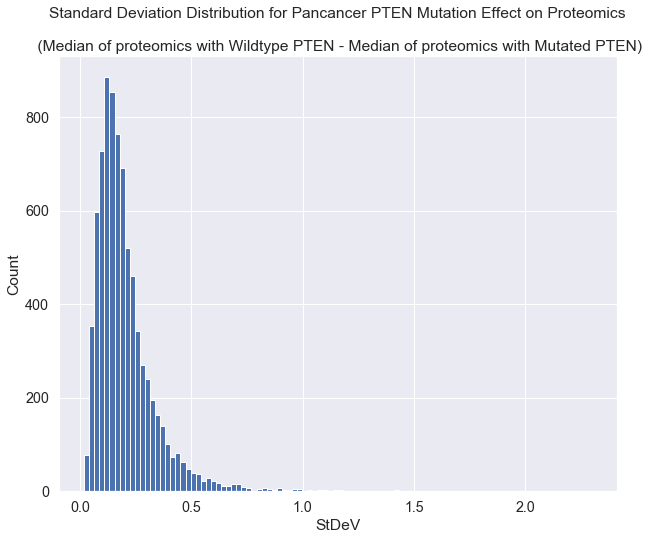

In [43]:
a = s.hist(bins = 100)
plt.title("Standard Deviation Distribution for Pancancer PTEN Mutation Effect on Proteomics\n\n (Median of proteomics with Wildtype PTEN - Median of proteomics with Mutated PTEN)")
plt.xlabel('StDeV')
plt.ylabel('Count')

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'StDeV')]

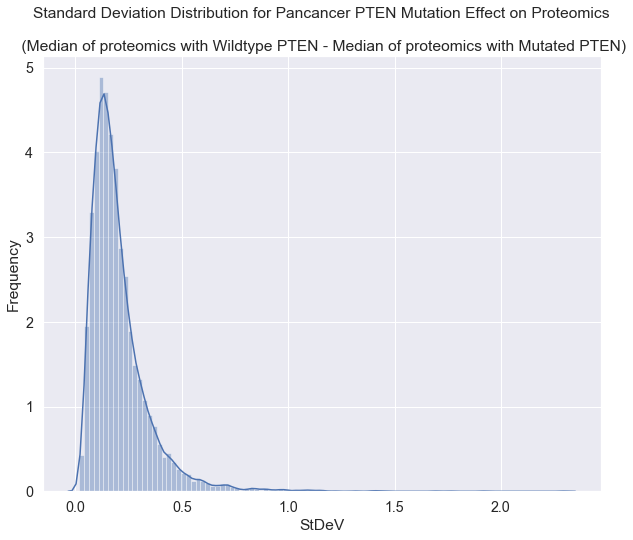

In [44]:
plt.rcParams['figure.figsize']=(10,8)
sns.set(font_scale = 1.3)
a = sns.distplot(s, bins = 100)

a.set_title("Standard Deviation Distribution for Pancancer PTEN Mutation Effect on Proteomics\n\n (Median of proteomics with Wildtype PTEN - Median of proteomics with Mutated PTEN)")
a.set(xlabel = 'StDeV', ylabel = 'Frequency')

Mean

In [45]:
mean_df = t.mean()

Text(0, 0.5, 'Count')

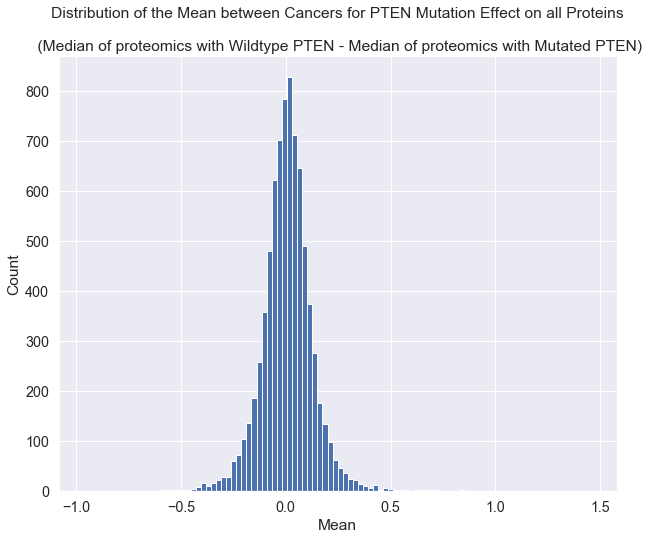

In [46]:
a = mean_df.hist(bins = 100)
plt.title("Distribution of the Mean between Cancers for PTEN Mutation Effect on all Proteins\n\n (Median of proteomics with Wildtype PTEN - Median of proteomics with Mutated PTEN)")
plt.xlabel('Mean')
plt.ylabel('Count')

In [47]:
m_df = t.median()

Text(0, 0.5, 'Count')

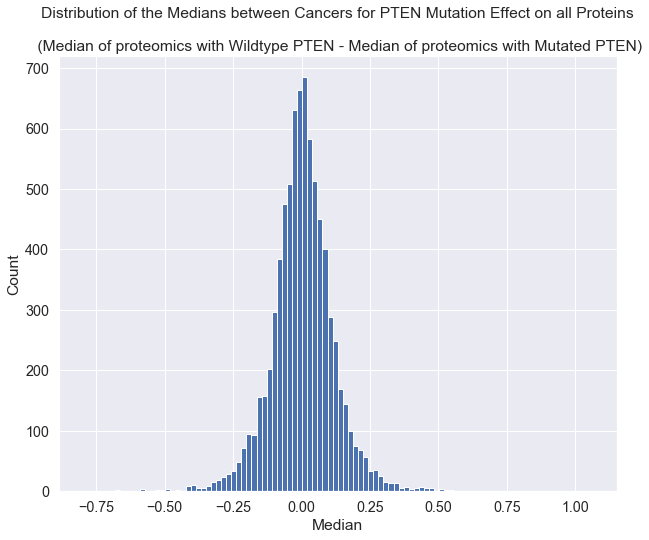

In [48]:
a = m_df.hist(bins = 100)
plt.title("Distribution of the Medians between Cancers for PTEN Mutation Effect on all Proteins\n\n (Median of proteomics with Wildtype PTEN - Median of proteomics with Mutated PTEN)")
plt.xlabel('Median')
plt.ylabel('Count')